 # Separación de variables usando SymPy

## Ejemplo

Ilustremos el método resolviendo la siguiente EDP

$$u_t = \alpha^2 u_{xx}\, ,\quad 0 < x < 1\, , 0 < t < \infty\, ,$$

con condiciones de frontera

\begin{align}
u(0, t) = 0\, ,\quad  0\leq t\leq \infty\\
u_x(1, t) + h u(1, t) = 0\, ,\quad  0\leq t\leq \infty\\
\end{align}

y condiciones iniciales

$$ u(x, 0) = x, \quad 0 \leq x \leq 1\, .$$

Este problema corresponde con el problema de una varilla
delgada que está aislada lateralmente y que tiene el extremo
derecho sumergido en un fluido agitado. Esto corresponde
a un problema de convección forzada para este extremo.


A continuación se ilustra su solución usando SymPy.

### Paso 1: Encontrar las soluciones elementales

In [1]:
%matplotlib widget

In [2]:
from sympy import *

In [3]:
init_session()

IPython console for SymPy 1.13.0 (Python 3.12.4-64-bit) (ground types: python)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.13.0/



In [4]:
u = symbols("u", cls=Function)
alpha = symbols("alpha", positive=True)

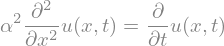

In [5]:
pde = Eq(alpha**2 * u(x, t).diff(x, 2), u(x, t).diff(t))
pde

Para hacer separación de variables podemos udar la función
``pde_separate`` que tiene como argumentos:

- La ecuación diferencial;
- La función original; y
- Las funciones de la separación como una lista.

In [6]:
X, T = symbols("X T", cls=Function)

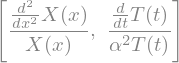

In [7]:
sep = pde_separate(pde, u(x, t), [X(x), T(t)])
sep

Podemos ver que tenemos las ecuaciones separadas. Ahora,
igualamos a una constante.

In [8]:
lamda = symbols("lamda", positive=True)

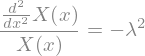

In [9]:
ode_x = Eq(sep[0], -lamda**2)
ode_x

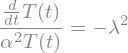

In [10]:
ode_t = Eq(sep[1], -lamda**2)
ode_t

Podemos resolver las ecuaciones para la variable espacial y temporal.

In [11]:
sol_t = dsolve(ode_t)
sol_t

In [12]:
sol_x = dsolve(ode_x)
sol_x

Y podemos escribir la solución completa a continuación.

In [13]:
C1, C2 = symbols("C1 C2")

In [14]:
sol = sol_t.rhs.subs(C1, 1) * sol_x.rhs
sol

<div class="alert alert-warning">

En este caso despreciamos la constante $C_1$ de de la exponencial
ya que esta queda absorbida en las constantes de la solución espacial.
</div>

### Paso 2: Soluciones que sastifaces condiciones de frontera

Al remplazar la condición de frontera en $x=0$ encontramos
la constante $C_2$.

In [15]:
h = symbols("h", positive=True)

In [16]:
solve(sol.subs(x, 0), C2)

Y obtenemos la siguiente solución

In [17]:
sol1 = sol.subs(C2, 0)
sol1

Ahora, para la condición de frontera del lado derecho
tenemos lo siguiente.

In [18]:
aux = sol1.diff(x).subs(x, 1) + h*sol1.subs(x, 1)
aux

En este caso no podemos resolver para $C_1$ ya que esto
llevaría a la solución nula.

Por tanto, para que esta expresión sea igual a $0$ debemos
encontrar los valores permitidos para la constante
de separación $\lambda$.

In [19]:
aux2 = expand(aux/(C1*exp(-alpha**2*lamda**2*t)))
aux2

Esta es una ecuación no lineal y necesitamos
de métodos numéricos para encontrar su solución.

Si asumimos que $h=1$, podemos encontrar las
siguientes soluciones aproximadas.

In [20]:
estimados = [2, 5, 8, 11, 15, 18]
raices = []
for estimado in estimados:
    raiz = nsolve(aux2.subs(h, 1), lamda, estimado)
    raices.append(raiz)
    display(raiz)

Los valores iniciales para la aproximación los podemos
tomar de una gráfica como la siguiente.

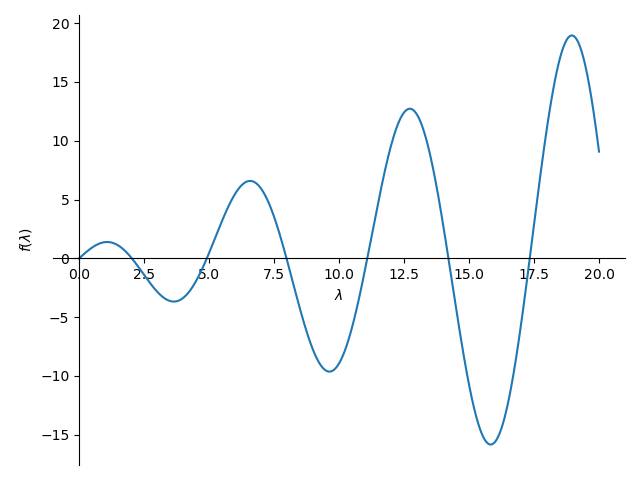

In [21]:
plot(aux2.subs(h, 1), (lamda, 0, 20))

En este caso tenemos, pues, que la base está formada por
funciones de la forma

$$\sin(\lambda_n)\, ,$$

con $\lambda_n$ la $n$-ésima raíz de la ecuación mostrada anteriormente.

A continuación se muestras las tres primera funciones. Debemos
resaltar que estas cumplen

$$X'(1) + X(1) = 0\, .$$

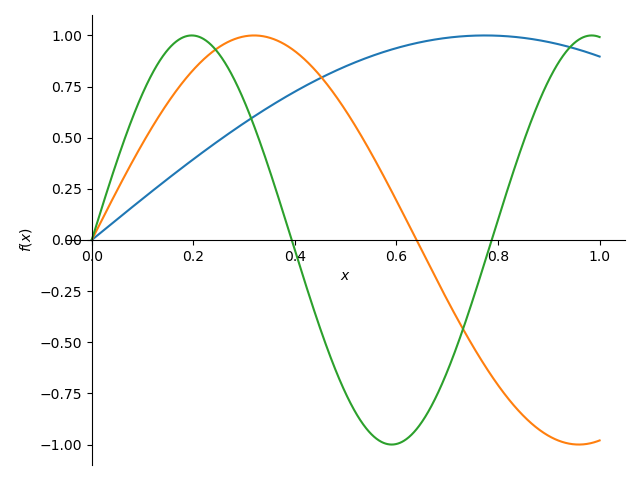

In [22]:
p = plot(sin(raices[0]*x), sin(raices[1]*x),
          sin(raices[2]*x), (x, 0, 1))

### Paso 3: Soluciones que satisfagan condiciones de frontera y condiciones iniciales

La solución más general está dada por

$$u(x, t) = \sum_{n=1}^\infty A_n e^{-(n\pi\alpha)^2 t}\sin(\lambda_n x)\, .$$

Si remplazamos la condición inicial tenemos

$$x = \sum_{n=1}^\infty A_n \sin(\lambda_n x)\, .$$

### Paso 4: Expansión de la condición inicial en funciones propias

Si multiplicamos la ecuación anterior por $sin(\lambda_m x)$ e
integramos en el dominio obtenemos lo siguietne

$$\int\limits_0^1 \eta \sin(\lambda_m \eta)\mathrm{d}\eta
= A_m\left(\frac{\lambda_m - \sin\lambda_m \cos\lambda_m}{2\lambda_m}\right)\, ,$$

o

$$A_n = \frac{2\lambda_n}{\lambda_n - \sin\lambda_n \cos\lambda_n}
\left[\frac{1}{\lambda_n^2}\sin\lambda_n - \frac{1}{\lambda_n}\cos\lambda_n\right]\, .$$

## Referencias

- Farlow, S. J. (1993). Partial differential equations for scientists and engineers. Courier Corporation.

- Kreyszig, E. (2009). Advanced Engineering Mathematics 10th Edition.

- SymPy Developers (2020). [PDE](https://docs.sympy.org/latest/modules/solvers/pde.html). SymPy Documentation.